In [107]:
import numpy as np
import matplotlib.pyplot as plt

#maqモデル
def extract_y_t(y_t_list :list,minus :int):
    if abs(minus) <= len(y_t_list):
        return y_t_list[minus]
    else:
        return 0

def ar_q(y_0 :float, c :float, sigma :float, theta_list :float, length: int) -> list:
    y_t_list = []
    noise_list = np.random.normal(0,sigma,length)
    for i in range(length):
        if i == 0:
            y_t_list.append(y_0)
        else:
            y_t = 0
            for n,theta in enumerate(theta_list):
                y_t += theta*extract_y_t(y_t_list,-(n+1))
            y_t_list.append(c+y_t+noise_list[i])
    return np.array(y_t_list)

#k次の自己共分散の値を計算
def autocovariance(k :int, ma1_array :np.array) -> np.array:
    auto_cov = np.cov(ma1_array[0:(len(ma1_array)-1)-k],ma1_array[0+k:(len(ma1_array)-1)],ddof=0)[0][1]
    return auto_cov

#k次の自己相関の値を計算
def autocorrelation(k :int, ma1_array :np.array) -> np.array:
    k_0 = autocovariance(0, ma1_array)
    k_k = autocovariance(k, ma1_array)
    return k_k/k_0

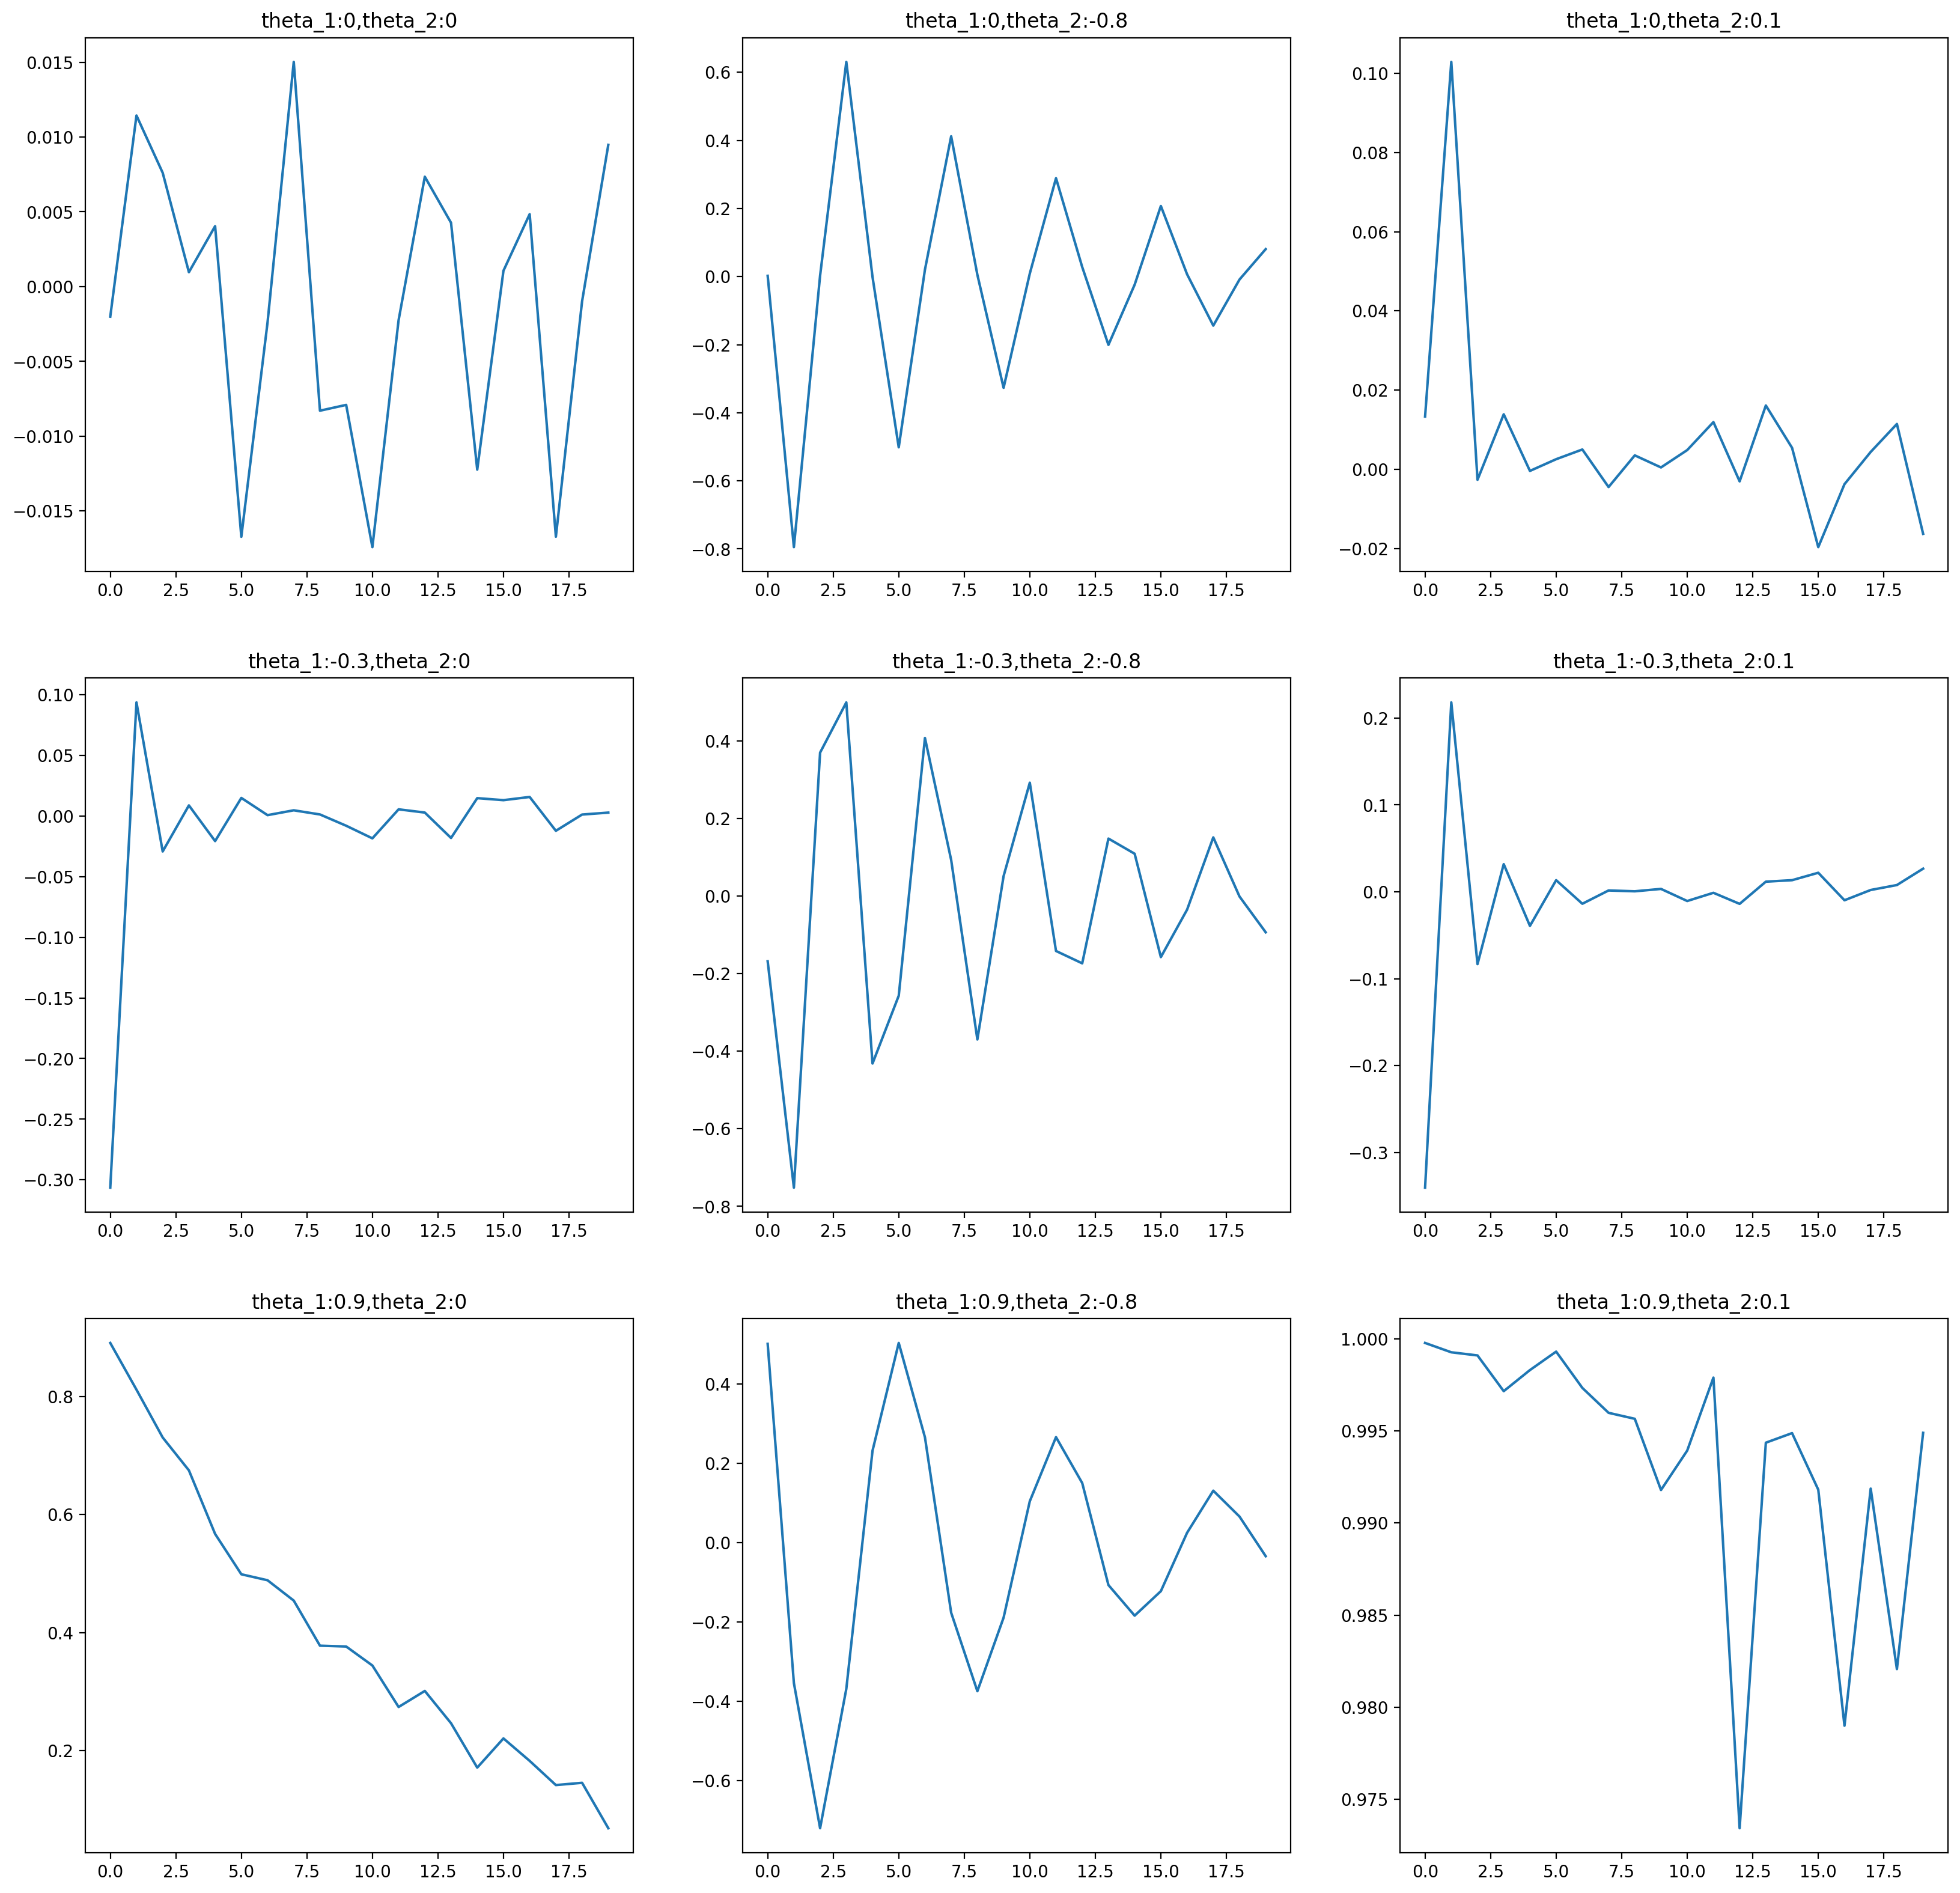

In [127]:
#いろいろなパラメータで探索

theta_1_list = [0,-0.3,0.9]
theta_2_list = [0,-0.8,0.1]

fig, ax = plt.subplots(3, 3, figsize=(20, 20),dpi=200)
for i,theta_1 in enumerate(theta_1_list):
    for j,theta_2 in enumerate(theta_2_list):
        ax[i, j].plot([autocorrelation((i+1),ar_q(0, 0,1, [theta_1,theta_2], 10000)) for i in range(20)])
        ax[i, j].set_title(f'theta_1:{theta_1},theta_2:{theta_2}')